In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#  Import and read the ca_michelin_yelp_data.csv.
michelin_star_df = pd.read_csv("ca_michelin_yelp_data.csv") 
michelin_star_df.head()

,name,review count,rating,price rating,year,latitude,longitude,city,region,zipCode,cuisine,price,url,stars,yelp url
0,Chez TJ,735 reviews,4 star rating,$$$$,2019.0,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/chez-tj-mountain-view...
1,Protégé,348 reviews,4.5 star rating,$$$$,2019.0,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/prot%C3%A9g%C3%A9-pal...
2,Madera,886 reviews,3.5 star rating,$$$,2019.0,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/madera-menlo-park?osq...
3,The Village Pub,1088 reviews,4 star rating,$$$$,2019.0,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/the-village-pub-woods...
4,Plumed Horse,1244 reviews,4 star rating,$$$$,2019.0,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/plumed-horse-saratoga...


In [2]:
michelin_star_df.rename(columns={'review count':'review_counts', 'price rating':'price_rating'}, inplace=True)
michelin_star_df['review_counts'] = michelin_star_df['review_counts'].str.replace(' reviews','').astype(float)
michelin_star_df['rating'] = michelin_star_df['rating'].str.replace(' star rating','').astype(float)
michelin_star_df.head()

,name,review_counts,rating,price_rating,year,latitude,longitude,city,region,zipCode,cuisine,price,url,stars,yelp url
0,Chez TJ,735.0,4.0,$$$$,2019.0,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/chez-tj-mountain-view...
1,Protégé,348.0,4.5,$$$$,2019.0,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/prot%C3%A9g%C3%A9-pal...
2,Madera,886.0,3.5,$$$,2019.0,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/madera-menlo-park?osq...
3,The Village Pub,1088.0,4.0,$$$$,2019.0,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/the-village-pub-woods...
4,Plumed Horse,1244.0,4.0,$$$$,2019.0,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/plumed-horse-saratoga...


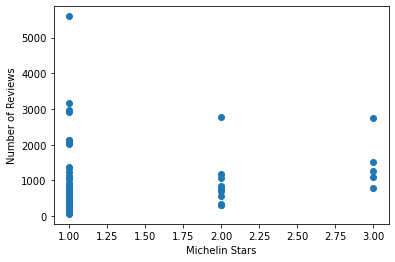

In [27]:
plt.scatter(michelin_star_df.stars, michelin_star_df.review_counts)
plt.xlabel('Michelin Stars')
plt.ylabel('Number of Reviews')
plt.show()

In [28]:
X = michelin_star_df.stars.values.reshape(-1, 1)
# -1 means that the number of rows is unspecified 
# 1 refers to the number of columns - meaning that there is only one independent variable. 
# X is the input data

In [29]:
X.shape

(67, 1)

In [30]:
y = michelin_star_df.review_counts

In [31]:
model = LinearRegression()

In [32]:
model.fit(X, y)

LinearRegression()

In [33]:
y_pred = model.predict(X)
print(y_pred.shape)

(67,)


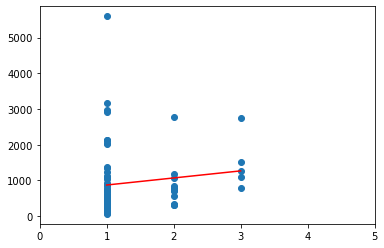

In [36]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlim(0, 5)
plt.show()